# Tugas Regresi

## Data Insurance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
% matplotlib inline

In [128]:
df=pd.read_csv('https://raw.githubusercontent.com/stezarpriansya/python-adsb/master/Insurance_Loss.csv', index_col = 0)
df.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
Policy Number,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595
144880,31,10,1,F,Single,6,P,402.197302
133742,56,37,1,M,Married,0,D,553.132096
151282,52,31,1,F,Married,15,P,292.430579
174407,20,3,1,M,Single,15,P,246.540576


## Mengganti nama kolom

In [129]:
df = df.rename(columns={'Policy Number':'PolicyNo','Years of Driving Experience': 'YearsDE','Number of Vehicles':'VehicleNo','Vehicle Age':'VehicleAge','Fuel Type':'Fuel'})
df.head(5)

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses
Policy Number,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595
144880,31,10,1,F,Single,6,P,402.197302
133742,56,37,1,M,Married,0,D,553.132096
151282,52,31,1,F,Married,15,P,292.430579
174407,20,3,1,M,Single,15,P,246.540576


## Analisis Awal

# New Section

In [7]:
df.shape

(15290, 8)

In [8]:
df.dtypes

Age             int64
YearsDE         int64
VehicleNo       int64
Gender         object
Married        object
VehicleAge      int64
Fuel           object
Losses        float64
dtype: object

In [9]:
df.describe()

,Age,YearsDE,VehicleNo,VehicleAge,Losses
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,42.328254,23.732897,2.495880,8.655723,389.859718
std,18.280511,17.850707,0.953776,4.344536,253.729433
min,16.000000,0.000000,1.000000,0.000000,12.534521
25%,24.000000,6.000000,2.000000,6.000000,226.434217
50%,42.000000,23.000000,2.000000,9.000000,354.937874
75%,61.000000,42.000000,3.000000,12.000000,488.676927
max,70.000000,53.000000,4.000000,15.000000,3500.000000


## Scatter Plot

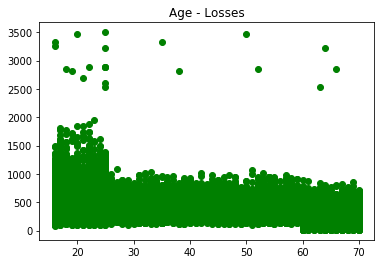

In [10]:
# membuat scatter plot
plt.scatter(df.Age,df.Losses, color='green')
plt.title('Age - Losses')
plt.show()

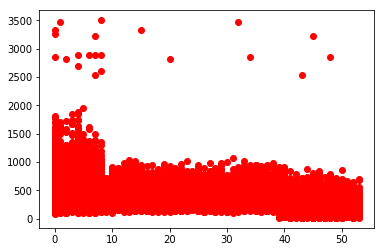

In [11]:
# membuat scatter plot
plt.scatter(df.YearsDE,df.Losses, color='red')
plt.show()

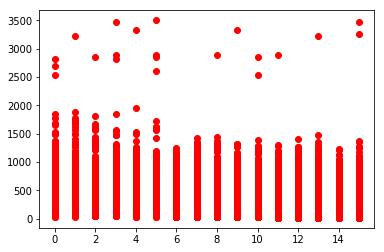

In [12]:
# membuat scatter plot
plt.scatter(df.VehicleAge,df.Losses, color='red')
plt.show()

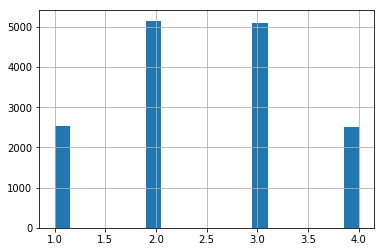

In [13]:
df['VehicleNo'].hist(bins=20)

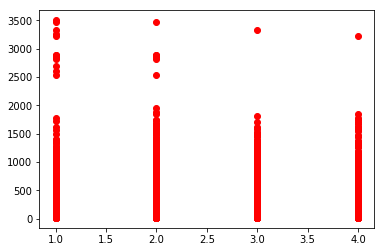

In [14]:
# membuat scatter plot
plt.scatter(df.VehicleNo,df.Losses, color='red')
plt.show()

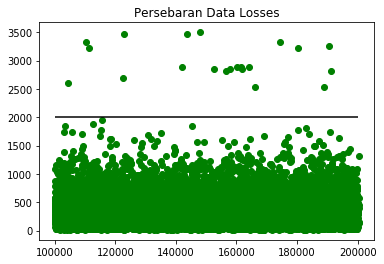

In [15]:
plt.scatter(df.index, df.Losses, color='green')
plt.title('Persebaran Data Losses')
plt.hlines(y=2000, xmin=100000,xmax=200000)
plt.show()

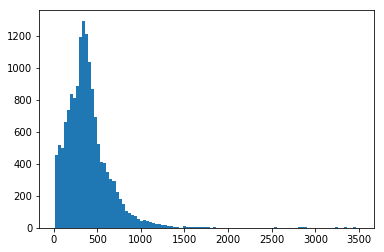

In [16]:
plt.hist(df.Losses,bins=100)
plt.show()

## Identifikasi Data Kategorik

VehicleNo
1    2533
2    5152
3    5095
4    2510
Name: Age, dtype: int64


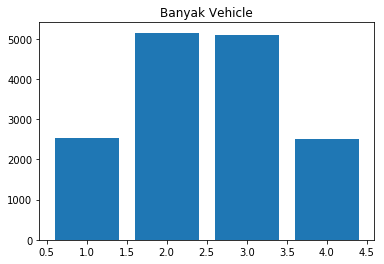

In [17]:
print(df.groupby('VehicleNo').count()['Age'])
VehicleNo_dist=df.groupby(['VehicleNo']).count()[['Age']]
plt.bar(VehicleNo_dist.index,VehicleNo_dist.Age)
plt.title('Banyak Vehicle')
plt.show()

Gender
F    7747
M    7543
Name: Age, dtype: int64


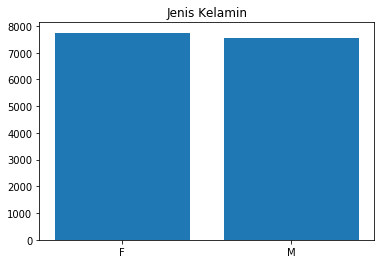

In [18]:
print(df.groupby('Gender').count()['Age'])
VehicleNo_dist=df.groupby(['Gender']).count()[['Age']]
plt.bar(VehicleNo_dist.index,VehicleNo_dist.Age)
plt.title('Jenis Kelamin')
plt.show()

Married
Married    7783
Single     7507
Name: Age, dtype: int64


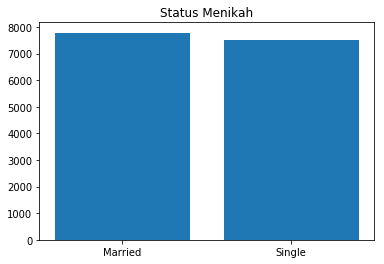

In [19]:
print(df.groupby('Married').count()['Age'])
VehicleNo_dist=df.groupby(['Married']).count()[['Age']]
plt.bar(VehicleNo_dist.index,VehicleNo_dist.Age)
plt.title('Status Menikah')
plt.show()

Fuel
D     3620
P    11670
Name: Age, dtype: int64


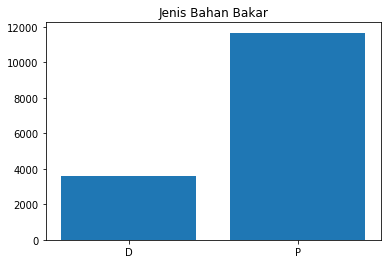

In [20]:
print(df.groupby('Fuel').count()['Age'])
VehicleNo_dist=df.groupby(['Fuel']).count()[['Age']]
plt.bar(VehicleNo_dist.index,VehicleNo_dist.Age)
plt.title('Jenis Bahan Bakar')
plt.show()

## Advance

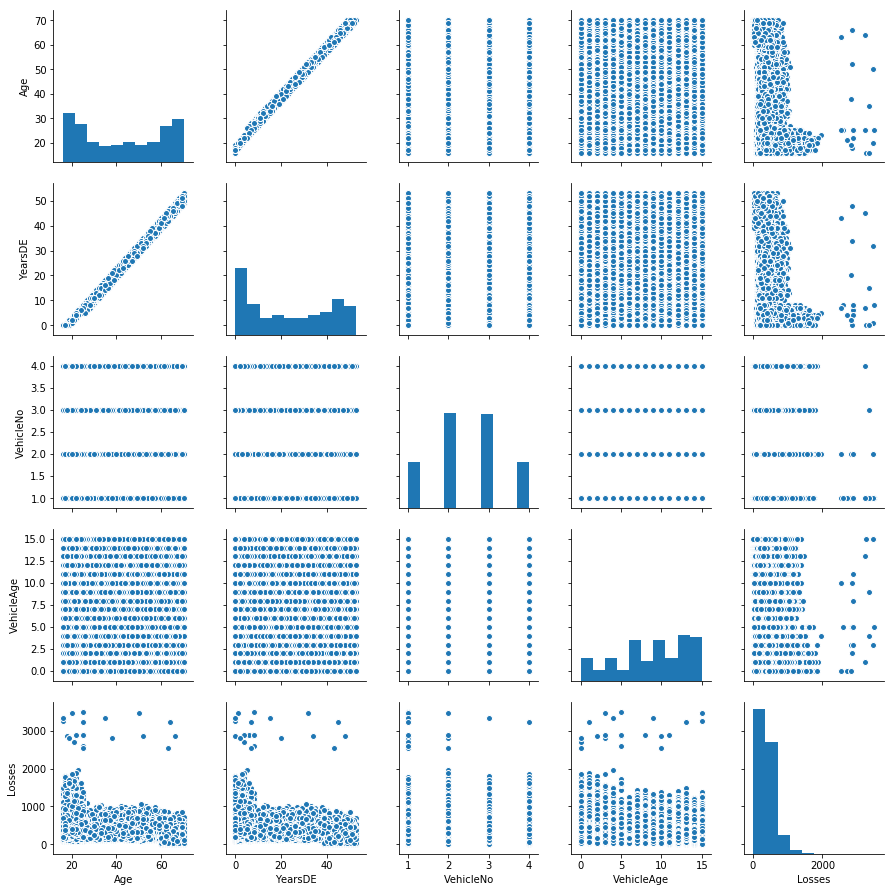

In [21]:
sns.pairplot(df)
plt.show()

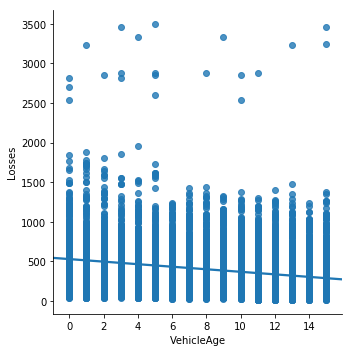

In [22]:
sns.lmplot(x='VehicleAge',y='Losses',data=df) # LMPLOT
plt.show()

          0         1         2         3
0  1.000065 -0.243587  0.997226 -0.442991
1 -0.243587  1.000065 -0.238188 -0.274739
2  0.997226 -0.238188  1.000065 -0.442144
3 -0.442991 -0.274739 -0.442144  1.000065


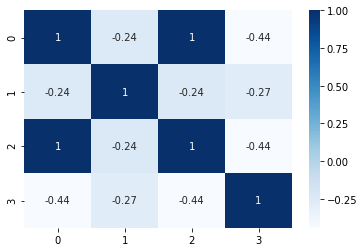

In [23]:
from sklearn import preprocessing
from matplotlib.pyplot import cm

std_scale=preprocessing.StandardScaler().fit(df[['Age','VehicleAge','YearsDE','Losses']])
df_std=std_scale.transform(df[['Age','VehicleAge','YearsDE','Losses']])

data=pd.DataFrame(df_std)
data.head()

print(data.cov())
sns.heatmap(data.cov(),cmap=cm.Blues,annot=True) # korelasi atau hubungan antar variabel
plt.show()

# Regresi Sederhana

## Losses - Age

Persamaan Regresi 

In [24]:
lm=smf.ols(formula='Losses~Age', data=df).fit()

In [25]:
lm.params

Intercept    650.102982
Age           -6.148216
dtype: float64

Memprediksi

In [26]:
X_new=pd.DataFrame({'Age':[45]})
X_new.head()

,Age
0,45


In [27]:
# memprediksi nilai baru
lm.predict(X_new)

0    373.433244
dtype: float64

Memprediksi dengan nilai min dan max

In [28]:
X_new=pd.DataFrame({'Age':[df.Age.min(),df.Age.max()]})
X_new.head()

,Age
0,16
1,70


In [29]:
preds=lm.predict(X_new)
preds

0    551.731519
1    219.727834
dtype: float64

 Menghitung r square

In [30]:
lm.rsquared

0.19621547798804284

Menghitung Interval Kepercayaan

In [31]:
lm.conf_int()

,0,1
Intercept,641.007528,659.198436
Age,-6.345486,-5.950947


kalau interval konfidensi melalui nol, berarti ada kemungkinan ada hubungan

kalau angka slope koefisien tidak nol, berarti tidak ada hubungannya

Melihat hasil secara keseluruhan

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3732.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:05   Log-Likelihood:            -1.0467e+05
No. Observations:               15290   AIC:                         2.094e+05
Df Residuals:                   15288   BIC:                         2.094e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    650.1030      4.640    140.101      0.000     641.008     659.198
Age           -6.1482      0.101    -61.090      0.000      -6.345      -5.951
==============================================================================
Omnibus:                    10677.162   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           404563.903
Skew:                           2.886   Prob(JB):                         0.00
Kurtosis:                      27.530   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Losses - YearsDE

In [33]:
lm_years=smf.ols(formula='Losses~YearsDE', data=df).fit()
lm_years.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     3714.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:05   Log-Likelihood:            -1.0468e+05
No. Observations:               15290   AIC:                         2.094e+05
Df Residuals:                   15288   BIC:                         2.094e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    539.0021      3.062    176.025      0.000     533.000     545.004
YearsDE       -6.2842      0.103    -60.945      0.000      -6.486      -6.082
==============================================================================
Omnibus:                    10708.100   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           407127.107
Skew:                           2.898   Prob(JB):                         0.00
Kurtosis:                      27.606   Cond. No.                         49.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresi Multiple Variabel

In [34]:
df.head(1)

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses
Policy Number,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595


## Losses - Age - YearsDE

In [35]:
lm=smf.ols(formula='Losses~Age+YearsDE', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1866.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:05   Log-Likelihood:            -1.0467e+05
No. Observations:               15290   AIC:                         2.094e+05
Df Residuals:                   15287   BIC:                         2.094e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    632.1300     24.376     25.933      0.000     584.350     679.910
Age           -5.1472      1.337     -3.851      0.000      -7.767      -2.527
YearsDE       -1.0280      1.369     -0.751      0.453      -3.711       1.655
==============================================================================
Omnibus:                    10683.294   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           405205.745
Skew:                           2.888   Prob(JB):                         0.00
Kurtosis:                      27.549   Cond. No.                         725.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Losses - Age - VehicleAge

In [36]:
lm=smf.ols(formula='Losses~Age+VehicleAge', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     4149.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:05   Log-Likelihood:            -1.0303e+05
No. Observations:               15290   AIC:                         2.061e+05
Df Residuals:                   15287   BIC:                         2.061e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    913.9222      6.027    151.635      0.000     902.108     925.736
Age           -7.5233      0.093    -80.736      0.000      -7.706      -7.341
VehicleAge   -23.7547      0.392    -60.585      0.000     -24.523     -22.986
==============================================================================
Omnibus:                    12232.548   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           787577.028
Skew:                           3.370   Prob(JB):                         0.00
Kurtosis:                      37.508   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Losses - YearsDE - VehicleAge

In [37]:
lm=smf.ols(formula='Losses~YearsDE+VehicleAge', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     4090.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:05   Log-Likelihood:            -1.0307e+05
No. Observations:               15290   AIC:                         2.061e+05
Df Residuals:                   15287   BIC:                         2.062e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    775.0284      4.806    161.260      0.000     765.608     784.449
YearsDE       -7.6481      0.096    -80.054      0.000      -7.835      -7.461
VehicleAge   -23.5286      0.393    -59.940      0.000     -24.298     -22.759
==============================================================================
Omnibus:                    12245.290   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           783046.096
Skew:                           3.378   Prob(JB):                         0.00
Kurtosis:                      37.401   Cond. No.                         88.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Losses - Age - YearsDE - VehicleAge

In [38]:
lm=smf.ols(formula='Losses~Age+YearsDE+VehicleAge', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     2771.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:05   Log-Likelihood:            -1.0302e+05
No. Observations:               15290   AIC:                         2.061e+05
Df Residuals:                   15286   BIC:                         2.061e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    981.0066     22.626     43.357      0.000     936.656    1025.357
Age          -11.2160      1.204     -9.315      0.000     -13.576      -8.856
YearsDE        3.7877      1.231      3.076      0.002       1.374       6.201
VehicleAge   -23.8326      0.393    -60.674      0.000     -24.603     -23.063
==============================================================================
Omnibus:                    12210.724   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           785012.271
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.453   Cond. No.                         756.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regresi dengan sklearn

In [39]:
import sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [40]:
y=df.Losses
feature_cols=['Age','YearsDE','VehicleNo']
x=df[feature_cols]

Penulisan LinearRegression(x,y) jangan sampai terbalik

In [41]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print(lr.coef_)

[-5.15015235 -1.0240709  -2.08382608]


In [43]:
print(lr.intercept_)

637.3618221669511


In [44]:
lr.score(x,y)

0.1963064903565488

# Mengganti Dummy Variable

Variabel untuk mengantisipasi data kategorical

In [45]:
df.head(1)

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses
Policy Number,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595


Membuat dummy variabel yaitu Gender --> IsGender

Base model variabel ketika dummy = 0, yaitu saat Male

In [46]:
df['IsGender']=df.Gender.map({'M':0,'F':1})
df.head(1)

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses,IsGender
Policy Number,,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595,0


In [47]:
df['IsMarried']=df.Married.map({'Single':0,'Married':1})
df.head(1)

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses,IsGender,IsMarried
Policy Number,,,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595,0,1


In [48]:
df['IsDiesel']=df.Fuel.map({'D':1,'P':0})
df.head(1)

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses,IsGender,IsMarried,IsDiesel
Policy Number,,,,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595,0,1,0


In [49]:
data = df[['Age',"YearsDE",'VehicleNo', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel', 'Losses']]
data.head()

,Age,YearsDE,VehicleNo,VehicleAge,IsGender,IsMarried,IsDiesel,Losses
Policy Number,,,,,,,,
150024,24,5,1,11,0,1,0,203.319595
144880,31,10,1,6,1,0,0,402.197302
133742,56,37,1,0,0,1,1,553.132096
151282,52,31,1,15,1,1,0,292.430579
174407,20,3,1,15,0,0,0,246.540576


# Korelasi

          0         1         2         3         4         5         6  \
0  1.000065  0.997226  0.008367 -0.243587 -0.005396 -0.004322 -0.327412   
1  0.997226  1.000065  0.008545 -0.238188 -0.007386 -0.005029 -0.325623   
2  0.008367  0.008545  1.000065  0.005924  0.001155 -0.009525 -0.003401   
3 -0.243587 -0.238188  0.005924  1.000065  0.003497 -0.008297 -0.289841   
4 -0.005396 -0.007386  0.001155  0.003497  1.000065  0.008002 -0.165311   
5 -0.004322 -0.005029 -0.009525 -0.008297  0.008002  1.000065 -0.218730   
6 -0.327412 -0.325623 -0.003401 -0.289841 -0.165311 -0.218730  1.000065   
7 -0.442991 -0.442144 -0.011554 -0.274739 -0.184351 -0.265348  0.724790   

          7  
0 -0.442991  
1 -0.442144  
2 -0.011554  
3 -0.274739  
4 -0.184351  
5 -0.265348  
6  0.724790  
7  1.000065  


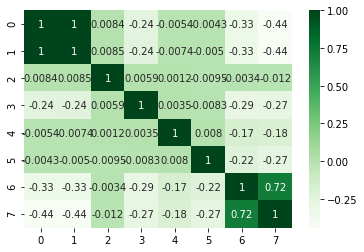

In [50]:
std_scale_data=preprocessing.StandardScaler().fit(data)
data_std=std_scale_data.transform(data)

data_scale = pd.DataFrame(data_std)
# data_scale.head()

print(data_scale.cov())
sns.heatmap(data_scale.cov(),cmap=cm.Greens,annot=True) # korelasi atau hubungan antar variabel
plt.show()

# Regresi tanpa Normalisasi

In [51]:
lm=smf.ols(formula='Losses~IsDiesel', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.691e+04
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:            -1.0065e+05
No. Observations:               15290   AIC:                         2.013e+05
Df Residuals:                   15288   BIC:                         2.013e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    287.4458      1.618    177.613      0.000     284.274     290.618
IsDiesel     432.5716      3.326    130.055      0.000     426.052     439.091
==============================================================================
Omnibus:                    15255.164   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2322439.853
Skew:                           4.538   Prob(JB):                         0.00
Kurtosis:                      62.691   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
lm=smf.ols(formula='Losses~Age+YearsDE+VehicleNo+VehicleAge+IsGender+IsMarried+IsDiesel', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     3718.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:                -98743.
No. Observations:               15290   AIC:                         1.975e+05
Df Residuals:                   15282   BIC:                         1.976e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    681.9238     18.102     37.671      0.000     646.442     717.406
Age           -4.1573      0.913     -4.553      0.000      -5.947      -2.368
YearsDE       -0.4317      0.932     -0.463      0.643      -2.258       1.395
VehicleNo     -1.9184      1.309     -1.465      0.143      -4.484       0.648
VehicleAge   -12.2328      0.328    -37.298      0.000     -12.876     -11.590
IsGender     -51.1051      2.547    -20.062      0.000     -56.098     -46.112
IsMarried    -79.8464      2.588    -30.852      0.000     -84.919     -74.774
IsDiesel     301.4193      3.589     83.988      0.000     294.385     308.454
==============================================================================
Omnibus:                    18019.325   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5261211.478
Skew:                           5.889   Prob(JB):                         0.00
Kurtosis:                      93.109   Cond. No.                         802.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
lm=smf.ols(formula='Losses~Age+VehicleAge+IsGender+IsMarried+IsDiesel', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     5204.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:                -98744.
No. Observations:               15290   AIC:                         1.975e+05
Df Residuals:                   15284   BIC:                         1.975e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    684.8932      6.425    106.594      0.000     672.299     697.487
Age           -4.5798      0.079    -58.084      0.000      -4.734      -4.425
VehicleAge   -12.2477      0.327    -37.446      0.000     -12.889     -11.607
IsGender     -51.0876      2.547    -20.058      0.000     -56.080     -46.095
IsMarried    -79.8139      2.588    -30.840      0.000     -84.887     -74.741
IsDiesel     301.3555      3.587     84.025      0.000     294.325     308.385
==============================================================================
Omnibus:                    18036.236   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5287909.370
Skew:                           5.898   Prob(JB):                         0.00
Kurtosis:                      93.338   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
data.head()

,Age,YearsDE,VehicleNo,VehicleAge,IsGender,IsMarried,IsDiesel,Losses
Policy Number,,,,,,,,
150024,24,5,1,11,0,1,0,203.319595
144880,31,10,1,6,1,0,0,402.197302
133742,56,37,1,0,0,1,1,553.132096
151282,52,31,1,15,1,1,0,292.430579
174407,20,3,1,15,0,0,0,246.540576


In [55]:
lm=smf.ols(formula='Losses~Age+VehicleAge+IsGender+IsMarried+IsDiesel', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     5204.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:                -98744.
No. Observations:               15290   AIC:                         1.975e+05
Df Residuals:                   15284   BIC:                         1.975e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    684.8932      6.425    106.594      0.000     672.299     697.487
Age           -4.5798      0.079    -58.084      0.000      -4.734      -4.425
VehicleAge   -12.2477      0.327    -37.446      0.000     -12.889     -11.607
IsGender     -51.0876      2.547    -20.058      0.000     -56.080     -46.095
IsMarried    -79.8139      2.588    -30.840      0.000     -84.887     -74.741
IsDiesel     301.3555      3.587     84.025      0.000     294.325     308.385
==============================================================================
Omnibus:                    18036.236   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5287909.370
Skew:                           5.898   Prob(JB):                         0.00
Kurtosis:                      93.338   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformasi (Nilai y)

## Log (y)

In [56]:
df['Losses_New']=np.log(df.Losses)
data1 = df[['Age','YearsDE','VehicleNo', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel', 'Losses_New']]
data1.head()
lm=smf.ols(formula='Losses_New~Age+YearsDE+VehicleNo+VehicleAge+IsGender+IsMarried+IsDiesel', data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Losses_New   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     2591.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:                -10985.
No. Observations:               15290   AIC:                         2.199e+04
Df Residuals:                   15282   BIC:                         2.205e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6524      0.058    114.264      0.000       6.538       6.767
Age           -0.0015      0.003     -0.515      0.607      -0.007       0.004
YearsDE       -0.0177      0.003     -5.920      0.000      -0.024      -0.012
VehicleNo      0.0004      0.004      0.102      0.919      -0.008       0.009
VehicleAge    -0.0443      0.001    -41.964      0.000      -0.046      -0.042
IsGender      -0.1289      0.008    -15.727      0.000      -0.145      -0.113
IsMarried     -0.2108      0.008    -25.321      0.000      -0.227      -0.194
IsDiesel       0.5638      0.012     48.843      0.000       0.541       0.586
==============================================================================
Omnibus:                     3523.700   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9249.055
Skew:                          -1.244   Prob(JB):                         0.00
Kurtosis:                       5.885   Cond. No.                         802.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
lm=smf.ols(formula='Losses_New~YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Losses_New   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     3627.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:                -10985.
No. Observations:               15290   AIC:                         2.198e+04
Df Residuals:                   15284   BIC:                         2.203e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6253      0.017    385.394      0.000       6.592       6.659
YearsDE       -0.0193      0.000    -74.489      0.000      -0.020      -0.019
VehicleAge    -0.0442      0.001    -42.153      0.000      -0.046      -0.042
IsGender      -0.1289      0.008    -15.735      0.000      -0.145      -0.113
IsMarried     -0.2107      0.008    -25.320      0.000      -0.227      -0.194
IsDiesel       0.5642      0.012     49.022      0.000       0.542       0.587
==============================================================================
Omnibus:                     3522.460   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9245.929
Skew:                          -1.244   Prob(JB):                         0.00
Kurtosis:                       5.885   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inverse(y)

In [58]:
df['Losses_perx']=1/df.Losses
data2 = df[['Age','YearsDE','VehicleNo', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel','Losses_perx']]
data2.head()
lm=smf.ols(formula='Losses_perx~Age+YearsDE+VehicleNo+VehicleAge+IsGender+IsMarried+IsDiesel', data=data2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Losses_perx   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     641.8
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:                 58556.
No. Observations:               15290   AIC:                        -1.171e+05
Df Residuals:                   15282   BIC:                        -1.170e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0019      0.001     -3.013      0.003      -0.003      -0.001
Age        -2.207e-05   3.11e-05     -0.710      0.478    -8.3e-05    3.89e-05
YearsDE        0.0002   3.17e-05      5.258      0.000       0.000       0.000
VehicleNo  -4.603e-07   4.46e-05     -0.010      0.992   -8.78e-05    8.69e-05
VehicleAge     0.0003   1.12e-05     27.718      0.000       0.000       0.000
IsGender       0.0007   8.67e-05      8.107      0.000       0.001       0.001
IsMarried      0.0010   8.81e-05     11.794      0.000       0.001       0.001
IsDiesel      -0.0007      0.000     -5.943      0.000      -0.001      -0.000
==============================================================================
Omnibus:                    14738.760   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           785344.826
Skew:                           4.699   Prob(JB):                         0.00
Kurtosis:                      36.829   Cond. No.                         802.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
lm=smf.ols(formula='Losses_perx~YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Losses_perx   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     898.5
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:                 58556.
No. Observations:               15290   AIC:                        -1.171e+05
Df Residuals:                   15284   BIC:                        -1.171e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0023      0.000    -12.468      0.000      -0.003      -0.002
YearsDE        0.0001   2.74e-06     52.696      0.000       0.000       0.000
VehicleAge     0.0003   1.11e-05     27.956      0.000       0.000       0.000
IsGender       0.0007   8.67e-05      8.100      0.000       0.001       0.001
IsMarried      0.0010   8.81e-05     11.805      0.000       0.001       0.001
IsDiesel      -0.0007      0.000     -5.907      0.000      -0.001      -0.000
==============================================================================
Omnibus:                    14738.809   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           785254.680
Skew:                           4.699   Prob(JB):                         0.00
Kurtosis:                      36.827   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Akar(y)

In [60]:
df['Losses_akar']=np.sqrt(df.Losses)
data3 = df[['Age','YearsDE','VehicleNo', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel','Losses_akar']]
data3.head()
lm=smf.ols(formula='Losses_akar~Age+YearsDE+VehicleNo+VehicleAge+IsGender+IsMarried+IsDiesel', data=data3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Losses_akar   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     4118.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -41186.
No. Observations:               15290   AIC:                         8.239e+04
Df Residuals:                   15282   BIC:                         8.245e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1531      0.420     62.320      0.0

In [61]:
lm=smf.ols(formula='Losses_akar~Age+YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Losses_akar   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     4804.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -41186.
No. Observations:               15290   AIC:                         8.239e+04
Df Residuals:                   15283   BIC:                         8.244e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1209      0.413     63.279      0.0

In [62]:
lm=smf.ols(formula='Losses_akar~YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Losses_akar   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     5761.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -41189.
No. Observations:               15290   AIC:                         8.239e+04
Df Residuals:                   15284   BIC:                         8.244e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.1083      0.124    202.579      0.0

In [63]:
lm=smf.ols(formula='Losses_akar~Age+YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Losses_akar   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     4804.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -41186.
No. Observations:               15290   AIC:                         8.239e+04
Df Residuals:                   15283   BIC:                         8.244e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1209      0.413     63.279      0.0

## Coba coba inverse

In [64]:
data4 = df[['Age','YearsDE','VehicleNo', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel','Losses_akar']]
data4.iloc[:,[0,1,3,7]] = 1/data4.iloc[:,[0,1,3,7]]
data4

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Age,YearsDE,VehicleNo,VehicleAge,IsGender,IsMarried,IsDiesel,Losses_akar
Policy Number,,,,,,,,
150024,0.041667,0.200000,1,0.090909,0,1,0,0.070131
144880,0.032258,0.100000,1,0.166667,1,0,0,0.049863
133742,0.017857,0.027027,1,inf,0,1,1,0.042519
151282,0.019231,0.032258,1,0.066667,1,1,0,0.058477
174407,0.050000,0.333333,1,0.066667,0,0,0,0.063688
142548,0.034483,0.125000,1,0.111111,0,1,0,0.050986
183396,0.027778,0.052632,1,inf,1,0,0,0.046516
106838,0.014925,0.020408,1,0.066667,1,1,0,0.076938
137434,0.014493,0.020833,1,0.200000,0,0,0,0.119614


# Feature Extraction (Age and YearsDE) *tidak recommended*

In [65]:
df['AgeDE']=df.YearsDE/df.Age
df.head(5)

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses,IsGender,IsMarried,IsDiesel,Losses_New,Losses_perx,Losses_akar,AgeDE
Policy Number,,,,,,,,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595,0,1,0,5.314779,0.004918,14.259018,0.208333
144880,31,10,1,F,Single,6,P,402.197302,1,0,0,5.996943,0.002486,20.054857,0.322581
133742,56,37,1,M,Married,0,D,553.132096,0,1,1,6.315597,0.001808,23.518761,0.660714
151282,52,31,1,F,Married,15,P,292.430579,1,1,0,5.678227,0.003420,17.100602,0.596154
174407,20,3,1,M,Single,15,P,246.540576,0,0,0,5.507527,0.004056,15.701611,0.150000


## Log (y)

In [66]:
data1 = df[['AgeDE','Age','YearsDE','VehicleNo', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel', 'Losses_New']]
lm=smf.ols(formula='Losses_New~AgeDE+VehicleNo+VehicleAge+IsGender+IsMarried+IsDiesel', data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Losses_New   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     2409.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -11878.
No. Observations:               15290   AIC:                         2.377e+04
Df Residuals:                   15283   BIC:                         2.382e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6345      0.023    285.992      0.000       6.589       6.680
AgeDE         -1.1322      0.020    -57.024      0.000      -1.171      -1.093
VehicleNo     -0.0008      0.004     -0.176      0.860      -0.010       0.008
VehicleAge    -0.0413      0.001    -36.504      0.000      -0.043      -0.039
IsGender      -0.1171      0.009    -13.489      0.000      -0.134      -0.100
IsMarried     -0.1978      0.009    -22.414      0.000      -0.215      -0.181
IsDiesel       0.6318      0.012     51.632      0.000       0.608       0.656
==============================================================================
Omnibus:                     4119.447   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11239.683
Skew:                          -1.438   Prob(JB):                         0.00
Kurtosis:                       6.060   Cond. No.                         68.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
data11 = df[['AgeDE','Age','YearsDE', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel', 'Losses_New']]
lm1=smf.ols(formula='Losses_New~AgeDE++VehicleAge+IsGender+IsMarried+IsDiesel', data=data11).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Losses_New   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     2890.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -11878.
No. Observations:               15290   AIC:                         2.377e+04
Df Residuals:                   15284   BIC:                         2.381e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6325      0.020    325.159      0.000       6.593       6.672
AgeDE         -1.1323      0.020    -57.029      0.000      -1.171      -1.093
VehicleAge    -0.0413      0.001    -36.507      0.000      -0.043      -0.039
IsGender      -0.1171      0.009    -13.490      0.000      -0.134      -0.100
IsMarried     -0.1978      0.009    -22.414      0.000      -0.215      -0.181
IsDiesel       0.6318      0.012     51.633      0.000       0.608       0.656
==============================================================================
Omnibus:                     4119.408   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11241.230
Skew:                          -1.438   Prob(JB):                         0.00
Kurtosis:                       6.061   Cond. No.                         64.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inverse(y)

In [68]:
data2 = df[['AgeDE','Age','YearsDE','VehicleNo', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel','Losses_perx']]
data2.head()
lm=smf.ols(formula='Losses_perx~AgeDE+VehicleNo+VehicleAge+IsGender+IsMarried+IsDiesel', data=data2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Losses_perx   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     542.3
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                 58061.
No. Observations:               15290   AIC:                        -1.161e+05
Df Residuals:                   15283   BIC:                        -1.161e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0022      0.000     -9.241      0.000      -0.003      -0.002
AgeDE          0.0083      0.000     40.563      0.000       0.008       0.009
VehicleNo   8.975e-06    4.6e-05      0.195      0.845   -8.13e-05    9.92e-05
VehicleAge     0.0003   1.17e-05     24.379      0.000       0.000       0.000
IsGender       0.0006   8.96e-05      6.782      0.000       0.000       0.001
IsMarried      0.0009    9.1e-05     10.259      0.000       0.001       0.001
IsDiesel      -0.0013      0.000    -10.093      0.000      -0.002      -0.001
==============================================================================
Omnibus:                    14816.467   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           757024.728
Skew:                           4.761   Prob(JB):                         0.00
Kurtosis:                      36.130   Cond. No.                         68.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Akar(y)

In [69]:
data3 = df[['AgeDE','Age','YearsDE','VehicleNo', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel','Losses_akar']]
data3.head()
lm=smf.ols(formula='Losses_akar~AgeDE+VehicleNo+VehicleAge+IsGender+IsMarried+IsDiesel', data=data3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Losses_akar   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     4095.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -41962.
No. Observations:               15290   AIC:                         8.394e+04
Df Residuals:                   15283   BIC:                         8.399e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4571      0.166    153.413      0.000      25.132      25.782
AgeDE         -8.5187      0.142    -59.979      0.000      -8.797      -8.240
VehicleNo     -0.0212      0.032     -0.663      0.507      -0.084       0.041
VehicleAge    -0.3281      0.008    -40.578      0.000      -0.344      -0.312
IsGender      -1.1234      0.062    -18.087      0.000      -1.245      -1.002
IsMarried     -1.8528      0.063    -29.345      0.000      -1.977      -1.729
IsDiesel       6.9110      0.088     78.955      0.000       6.739       7.083
==============================================================================
Omnibus:                     2420.251   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34116.962
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                      10.293   Cond. No.                         68.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
lm=smf.ols(formula='Losses_akar~YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Losses_akar   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     5761.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -41189.
No. Observations:               15290   AIC:                         8.239e+04
Df Residuals:                   15284   BIC:                         8.244e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.1083      0.124    202.579      0.000      24.865      25.351
YearsDE       -0.1397      0.002    -74.872      0.000      -0.143      -0.136
VehicleAge    -0.3420      0.008    -45.236      0.000      -0.357      -0.327
IsGender      -1.1961      0.059    -20.252      0.000      -1.312      -1.080
IsMarried     -1.9282      0.060    -32.137      0.000      -2.046      -1.811
IsDiesel       6.5085      0.083     78.436      0.000       6.346       6.671
==============================================================================
Omnibus:                     3265.510   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51256.951
Skew:                           0.595   Prob(JB):                         0.00
Kurtosis:                      11.890   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformasi Data (Age dan Losses)

In [71]:
data5 = df
data5['New_Losses'] = data5.Losses

In [72]:
data5.loc[df.Losses>2000,'New_Losses']=2000

In [73]:
# data5.head()
data5['New_Age'] = data5.Age

In [74]:
data5.loc[(data5.Age > 14) & (data5.Age <= 24),'New_Age']= 19.5
data5.loc[(data5.Age > 24) & (data5.Age <= 34),'New_Age']= 29.5
data5.loc[(data5.Age > 34) & (data5.Age <= 44),'New_Age']= 39.5
data5.loc[(data5.Age > 44) & (data5.Age <= 54),'New_Age']= 49.5
data5.loc[(data5.Age > 54) & (data5.Age <= 64),'New_Age']= 59.5
data5.loc[(data5.Age > 64) & (data5.Age <= 74),'New_Age']= 69.5

In [75]:
data5['New_Losses_Log'] = np.sqrt(data5.New_Losses)
lm=smf.ols(formula='New_Losses_Log~Age+YearsDE+VehicleNo+VehicleAge+IsGender+IsMarried+IsDiesel', data=data5).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         New_Losses_Log   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     4325.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -40759.
No. Observations:               15290   AIC:                         8.153e+04
Df Residuals:                   15282   BIC:                         8.160e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9995      0.408     63.707      0.000      25.200      26.799
Age           -0.0507      0.021     -2.463      0.014      -0.091      -0.010
YearsDE       -0.0877      0.021     -4.176      0.000      -0.129      -0.047
VehicleNo      0.0010      0.030      0.035      0.972      -0.057       0.059
VehicleAge    -0.3423      0.007    -46.299      0.000      -0.357      -0.328
IsGender      -1.1841      0.057    -20.617      0.000      -1.297      -1.072
IsMarried     -1.9113      0.058    -32.757      0.000      -2.026      -1.797
IsDiesel       6.4804      0.081     80.094      0.000       6.322       6.639
==============================================================================
Omnibus:                      885.727   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3825.466
Skew:                          -0.032   Prob(JB):                         0.00
Kurtosis:                       5.450   Cond. No.                         802.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
lm=smf.ols(formula='New_Losses~New_Age+YearsDE+VehicleNo+VehicleAge+IsGender+IsMarried+IsDiesel', data=data5).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             New_Losses   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     4677.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:07   Log-Likelihood:                -96859.
No. Observations:               15290   AIC:                         1.937e+05
Df Residuals:                   15282   BIC:                         1.938e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    601.6805      8.831     68.129      0.000     584.370     618.991
New_Age       -0.2910      0.364     -0.799      0.424      -1.005       0.423
YearsDE       -4.3221      0.376    -11.504      0.000      -5.059      -3.586
VehicleNo     -0.5173      1.157     -0.447      0.655      -2.786       1.751
VehicleAge   -11.9302      0.289    -41.300      0.000     -12.496     -11.364
IsGender     -50.1783      2.252    -22.282      0.000     -54.592     -45.764
IsMarried    -77.8120      2.288    -34.010      0.000     -82.297     -73.327
IsDiesel     301.2458      3.166     95.137      0.000     295.039     307.452
==============================================================================
Omnibus:                     9171.233   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273633.791
Skew:                           2.368   Prob(JB):                         0.00
Kurtosis:                      23.176   Cond. No.                         448.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
lm=smf.ols(formula='New_Losses~YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data5).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             New_Losses   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     6549.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:08   Log-Likelihood:                -96859.
No. Observations:               15290   AIC:                         1.937e+05
Df Residuals:                   15284   BIC:                         1.938e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    594.8973      4.726    125.888      0.000     585.635     604.160
YearsDE       -4.6172      0.071    -64.910      0.000      -4.757      -4.478
VehicleAge   -11.9166      0.288    -41.338      0.000     -12.482     -11.352
IsGender     -50.1798      2.252    -22.284      0.000     -54.594     -45.766
IsMarried    -77.7913      2.288    -34.005      0.000     -82.275     -73.307
IsDiesel     301.3471      3.164     95.250      0.000     295.146     307.548
==============================================================================
Omnibus:                     9176.951   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274234.809
Skew:                           2.370   Prob(JB):                         0.00
Kurtosis:                      23.199   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
data5['AgeDE']=data5.YearsDE/data5.Age
data5.head()

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses,IsGender,IsMarried,IsDiesel,Losses_New,Losses_perx,Losses_akar,AgeDE,New_Losses,New_Age,New_Losses_Log
Policy Number,,,,,,,,,,,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595,0,1,0,5.314779,0.004918,14.259018,0.208333,203.319595,19.5,14.259018
144880,31,10,1,F,Single,6,P,402.197302,1,0,0,5.996943,0.002486,20.054857,0.322581,402.197302,29.5,20.054857
133742,56,37,1,M,Married,0,D,553.132096,0,1,1,6.315597,0.001808,23.518761,0.660714,553.132096,59.5,23.518761
151282,52,31,1,F,Married,15,P,292.430579,1,1,0,5.678227,0.003420,17.100602,0.596154,292.430579,49.5,17.100602
174407,20,3,1,M,Single,15,P,246.540576,0,0,0,5.507527,0.004056,15.701611,0.150000,246.540576,19.5,15.701611


In [79]:
lm=smf.ols(formula='New_Losses~AgeDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data5).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             New_Losses   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     6031.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:08   Log-Likelihood:                -97283.
No. Observations:               15290   AIC:                         1.946e+05
Df Residuals:                   15284   BIC:                         1.946e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    617.1671      5.438    113.499      0.000     606.509     627.825
AgeDE       -297.6384      5.293    -56.235      0.000    -308.013    -287.264
VehicleAge   -11.8385      0.301    -39.286      0.000     -12.429     -11.248
IsGender     -48.4234      2.315    -20.920      0.000     -52.961     -43.886
IsMarried    -76.1811      2.353    -32.379      0.000     -80.793     -71.569
IsDiesel     310.1912      3.262     95.094      0.000     303.797     316.585
==============================================================================
Omnibus:                     8248.422   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211984.930
Skew:                           2.075   Prob(JB):                         0.00
Kurtosis:                      20.763   Cond. No.                         64.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
lm=smf.ols(formula='New_Losses~New_Age+YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data5).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             New_Losses   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     5457.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:08   Log-Likelihood:                -96859.
No. Observations:               15290   AIC:                         1.937e+05
Df Residuals:                   15283   BIC:                         1.938e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    600.4006      8.354     71.868      0.000     584.025     616.776
New_Age       -0.2909      0.364     -0.799      0.424      -1.005       0.423
YearsDE       -4.3224      0.376    -11.505      0.000      -5.059      -3.586
VehicleAge   -11.9312      0.289    -41.305      0.000     -12.497     -11.365
IsGender     -50.1797      2.252    -22.283      0.000     -54.594     -45.766
IsMarried    -77.8029      2.288    -34.008      0.000     -82.287     -73.319
IsDiesel     301.2448      3.166     95.139      0.000     295.038     307.451
==============================================================================
Omnibus:                     9176.986   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274314.881
Skew:                           2.370   Prob(JB):                         0.00
Kurtosis:                      23.202   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
data5.head()

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses,IsGender,IsMarried,IsDiesel,Losses_New,Losses_perx,Losses_akar,AgeDE,New_Losses,New_Age,New_Losses_Log
Policy Number,,,,,,,,,,,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595,0,1,0,5.314779,0.004918,14.259018,0.208333,203.319595,19.5,14.259018
144880,31,10,1,F,Single,6,P,402.197302,1,0,0,5.996943,0.002486,20.054857,0.322581,402.197302,29.5,20.054857
133742,56,37,1,M,Married,0,D,553.132096,0,1,1,6.315597,0.001808,23.518761,0.660714,553.132096,59.5,23.518761
151282,52,31,1,F,Married,15,P,292.430579,1,1,0,5.678227,0.003420,17.100602,0.596154,292.430579,49.5,17.100602
174407,20,3,1,M,Single,15,P,246.540576,0,0,0,5.507527,0.004056,15.701611,0.150000,246.540576,19.5,15.701611


# Pembagian Data Set

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(data5[['YearsDE', 'VehicleNo','VehicleAge','New_Age', 'IsGender', 'IsMarried', 'IsDiesel']],data5.New_Losses, test_size=0.3, random_state=42)

In [84]:
data_train = pd.concat([X_train,Y_train],axis=1)

In [85]:
data_train.head()

,YearsDE,VehicleNo,VehicleAge,New_Age,IsGender,IsMarried,IsDiesel,New_Losses
Policy Number,,,,,,,,
192598,32,3,11,49.5,1,0,0,262.264769
175302,31,3,7,49.5,1,0,0,405.208415
129325,4,1,7,19.5,1,0,0,421.264034
106368,37,2,7,59.5,1,0,0,414.935757
105320,28,2,6,49.5,0,0,0,414.255336


## LM2

In [86]:
lm2=smf.ols(formula='New_Losses~New_Age+VehicleNo+YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             New_Losses   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     3329.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:08   Log-Likelihood:                -67659.
No. Observations:               10703   AIC:                         1.353e+05
Df Residuals:                   10695   BIC:                         1.354e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    596.7991     10.457     57.070      0.000     576.301     617.297
New_Age       -0.2871      0.432     -0.665      0.506      -1.133       0.559
VehicleNo      0.8563      1.363      0.628      0.530      -1.815       3.528
YearsDE       -4.3141      0.445     -9.697      0.000      -5.186      -3.442
VehicleAge   -12.0002      0.342    -35.116      0.000     -12.670     -11.330
IsGender     -49.1415      2.652    -18.530      0.000     -54.340     -43.943
IsMarried    -76.1257      2.701    -28.182      0.000     -81.421     -70.831
IsDiesel     301.6288      3.748     80.467      0.000     294.281     308.977
==============================================================================
Omnibus:                     5951.395   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147568.673
Skew:                           2.175   Prob(JB):                         0.00
Kurtosis:                      20.663   Cond. No.                         451.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fit Model

In [87]:
X = X_train
Y = Y_train
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
X_train.shape

(10703, 7)

In [89]:
X_test.shape

(4587, 7)

In [90]:
Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)

In [91]:
train_pred_df = pd.DataFrame({'actual' : Y_train, 'predicted' : Y_pred_train, 'residual' : Y_train -Y_pred_train}) 
test_pred_df = pd.DataFrame({'actual' : Y_test, 'predicted' : Y_pred_test, 'residual' : Y_test - Y_pred_test}) 

In [92]:
from sklearn import metrics

In [93]:
rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
rmse_train

134.63605010461015

In [94]:
rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))
rmse_test

140.574883090866

In [95]:
metrics.r2_score(Y_train, Y_pred_train)

0.6854404605970887

In [96]:
metrics.r2_score(Y_test, Y_pred_test)

0.6733760984170675

## Plot Residu

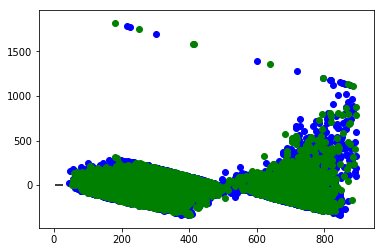

In [97]:
plt.scatter(train_pred_df.predicted, train_pred_df.residual, color='blue')
plt.scatter(test_pred_df.predicted, test_pred_df.residual, color='green')
plt.hlines(y=0, xmin=2, xmax=27)
plt.show()

In [98]:
import seaborn as sns

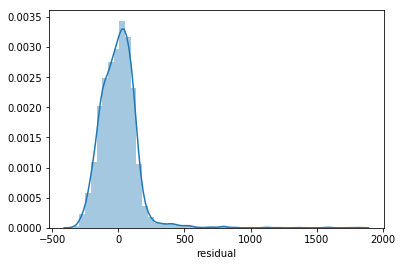

In [99]:
sns.distplot(test_pred_df.residual)

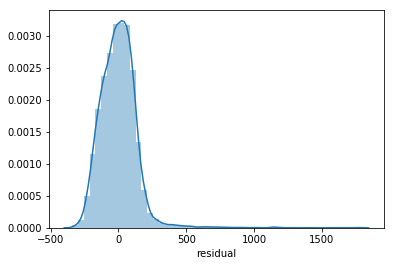

In [125]:
sns.distplot(train_pred_df.residual)

# Uji Asumsi

## Test *Outlier*

In [101]:
influence = lm2.get_influence()
resid_student = influence.resid_studentized_external

In [102]:
resid=pd.concat([X_train.reset_index(),pd.Series(resid_student,name="Studentized_Residuals")],axis=1)
resid.head(5)

,Policy Number,YearsDE,VehicleNo,VehicleAge,New_Age,IsGender,IsMarried,IsDiesel,Studentized_Residuals
0,192598,32,3,11,49.5,1,0,0,-0.027466
1,175302,31,3,7,49.5,1,0,0,0.645533
2,129325,4,1,7,19.5,1,0,0,-0.151487
3,106368,37,2,7,59.5,1,0,0,0.937742
4,105320,28,2,6,49.5,0,0,0,0.168946


In [103]:
resid.loc[np.absolute(resid["Studentized_Residuals"])>3].shape

(107, 9)

In [104]:
#reset index dari data train
X_train_reset = X_train.reset_index().iloc[:, 1:]
Y_train_reset = Y_train.reset_index().New_Losses #ambil variable losses aja

In [105]:
ind=resid.loc[np.absolute(resid["Studentized_Residuals"])>3,:].index

In [106]:
X_train_reset.drop(ind,inplace=True)
Y_train_reset.drop(ind,inplace=True)

### Fit Model (Stats Model) after drop outlier

In [107]:
# data_train_baru = X_train_reset
data_train_baru = pd.concat([X_train_reset,Y_train_reset],axis=1)

In [108]:
lm_drop=smf.ols(formula='New_Losses~New_Age+VehicleNo+YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data_train_baru).fit()
lm_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             New_Losses   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     4004.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:56   Log-Likelihood:                -65004.
No. Observations:               10596   AIC:                         1.300e+05
Df Residuals:                   10588   BIC:                         1.301e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    561.5427      8.723     64.375      0.000     544.444     578.642
New_Age       -0.1006      0.360     -0.280      0.780      -0.805       0.604
VehicleNo      1.2467      1.137      1.096      0.273      -0.982       3.476
YearsDE       -4.1318      0.370    -11.153      0.000      -4.858      -3.406
VehicleAge   -10.7994      0.286    -37.752      0.000     -11.360     -10.239
IsGender     -41.6955      2.209    -18.875      0.000     -46.026     -37.365
IsMarried    -67.6380      2.249    -30.073      0.000     -72.047     -63.229
IsDiesel     285.8792      3.126     91.465      0.000     279.753     292.006
==============================================================================
Omnibus:                       98.526   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.255
Skew:                           0.215   Prob(JB):                     2.30e-23
Kurtosis:                       3.228   Cond. No.                         453.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
lm_drop=smf.ols(formula='New_Losses~YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data_train_baru).fit()
lm_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             New_Losses   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     5605.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:56   Log-Likelihood:                -65004.
No. Observations:               10596   AIC:                         1.300e+05
Df Residuals:                   10590   BIC:                         1.301e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    562.6949      4.670    120.490      0.000     553.541     571.849
YearsDE       -4.2326      0.070    -60.736      0.000      -4.369      -4.096
VehicleAge   -10.7905      0.285    -37.807      0.000     -11.350     -10.231
IsGender     -41.6882      2.209    -18.873      0.000     -46.018     -37.358
IsMarried    -67.6575      2.249    -30.085      0.000     -72.066     -63.249
IsDiesel     285.9440      3.123     91.568      0.000     279.823     292.065
==============================================================================
Omnibus:                       98.747   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.516
Skew:                           0.215   Prob(JB):                     2.02e-23
Kurtosis:                       3.229   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Autokorelasi

In [110]:
from statsmodels.stats import diagnostic
diagnostic.acorr_ljungbox(lm2.resid, lags=1)

(array([0.85619551]), array([0.35480554]))

In [111]:
#setelah drop outlier
from statsmodels.stats import diagnostic
diagnostic.acorr_ljungbox(lm_drop.resid, lags=1)

(array([0.57607267]), array([0.44785584]))

## Multikolinearitas

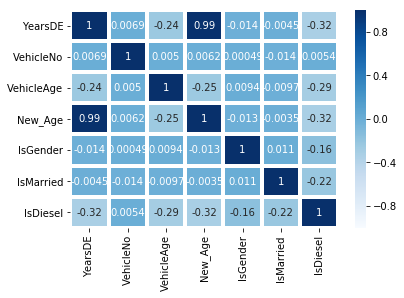

In [112]:
import seaborn
corr_df=X_train.corr(method='pearson')
seaborn.heatmap(corr_df,cmap='Blues',vmax=1.0,vmin=-1.0,linewidth=3,annot=True)

In [113]:
import scipy
mc=scipy.corrcoef(X_train,rowvar=0)
print(mc)

[[ 1.00000000e+00  6.87532207e-03 -2.41788411e-01  9.86552548e-01
  -1.42263113e-02 -4.46114323e-03 -3.21390970e-01]
 [ 6.87532207e-03  1.00000000e+00  4.97820112e-03  6.18731228e-03
   4.85109352e-04 -1.39850273e-02  5.39112111e-03]
 [-2.41788411e-01  4.97820112e-03  1.00000000e+00 -2.46903906e-01
   9.37635408e-03 -9.72140466e-03 -2.91566982e-01]
 [ 9.86552548e-01  6.18731228e-03 -2.46903906e-01  1.00000000e+00
  -1.27270375e-02 -3.46862860e-03 -3.19691878e-01]
 [-1.42263113e-02  4.85109352e-04  9.37635408e-03 -1.27270375e-02
   1.00000000e+00  1.12853108e-02 -1.57996278e-01]
 [-4.46114323e-03 -1.39850273e-02 -9.72140466e-03 -3.46862860e-03
   1.12853108e-02  1.00000000e+00 -2.21996246e-01]
 [-3.21390970e-01  5.39112111e-03 -2.91566982e-01 -3.19691878e-01
  -1.57996278e-01 -2.21996246e-01  1.00000000e+00]]


In [114]:
#select feature untuk data train baru
X_train_reset_baru = X_train_reset[['YearsDE', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel']]

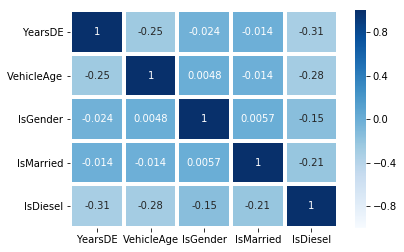

In [115]:
import seaborn
corr_df=X_train_reset_baru.corr(method='pearson')
seaborn.heatmap(corr_df,cmap='Blues',vmax=1.0,vmin=-1.0,linewidth=3,annot=True)

In [116]:
import scipy
mc=scipy.corrcoef(X_train_reset_baru,rowvar=0)
print(mc)

[[ 1.         -0.25436433 -0.02350168 -0.01389906 -0.30786437]
 [-0.25436433  1.          0.00479442 -0.0144543  -0.28472544]
 [-0.02350168  0.00479442  1.          0.0057408  -0.14706599]
 [-0.01389906 -0.0144543   0.0057408   1.         -0.21229379]
 [-0.30786437 -0.28472544 -0.14706599 -0.21229379  1.        ]]


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
#after drop outlier
X_train_reset_vif = X_train_reset[['YearsDE', 'VehicleAge', 'IsGender', 'IsMarried', 'IsDiesel']]
[variance_inflation_factor(X_train_reset_vif.values,j) for j in range(X_train_reset_vif.shape[1])]

[1.9526213919571858,
 2.523186374042763,
 1.8468494006934513,
 1.8311763529304936,
 1.1145546892950906]

## Heteroskedasitas

In [119]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
test = sms.het_goldfeldquandt(lm2.resid,lm2.model.exog)
test

(0.9872790673718129, 0.6800731832156841, 'increasing')

H0 : error term are homoscedacity
H1 : error term are heteroscedacity

p-value > 0.05 maka H0 gagal ditolak, sehingga error term are homoscedacity

In [120]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
test = sms.het_goldfeldquandt(lm_drop.resid,lm_drop.model.exog)
test

(1.0532460280950335, 0.02959864408417288, 'increasing')

# Transformasi

In [121]:
lm_drop=smf.ols(formula='New_Losses~YearsDE+VehicleAge+IsGender+IsMarried+IsDiesel', data=data_train_baru).fit()
lm_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             New_Losses   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     5605.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        14:09:57   Log-Likelihood:                -65004.
No. Observations:               10596   AIC:                         1.300e+05
Df Residuals:                   10590   BIC:                         1.301e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    562.6949      4.670    120.490      0.000     553.541     571.849
YearsDE       -4.2326      0.070    -60.736      0.000      -4.369      -4.096
VehicleAge   -10.7905      0.285    -37.807      0.000     -11.350     -10.231
IsGender     -41.6882      2.209    -18.873      0.000     -46.018     -37.358
IsMarried    -67.6575      2.249    -30.085      0.000     -72.066     -63.249
IsDiesel     285.9440      3.123     91.568      0.000     279.823     292.065
==============================================================================
Omnibus:                       98.747   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.516
Skew:                           0.215   Prob(JB):                     2.02e-23
Kurtosis:                       3.229   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
data_train_baru.head()

,YearsDE,VehicleNo,VehicleAge,New_Age,IsGender,IsMarried,IsDiesel,New_Losses
0,32,3,11,49.5,1,0,0,262.264769
1,31,3,7,49.5,1,0,0,405.208415
2,4,1,7,19.5,1,0,0,421.264034
3,37,2,7,59.5,1,0,0,414.935757
4,28,2,6,49.5,0,0,0,414.255336


In [132]:
# data5.head()
data_stezar = df
data_stezar['New_Age'] = data_stezar.Age
data_stezar['New_Vehicle_Age'] = data_stezar.VehicleAge

In [133]:
data_stezar.loc[(data_stezar.Age > 14) & (data_stezar.Age <= 24),'New_Age']= 19.5
data_stezar.loc[(data_stezar.Age > 24) & (data_stezar.Age <= 34),'New_Age']= 29.5
data_stezar.loc[(data_stezar.Age > 34) & (data_stezar.Age <= 44),'New_Age']= 39.5
data_stezar.loc[(data_stezar.Age > 44) & (data_stezar.Age <= 54),'New_Age']= 49.5
data_stezar.loc[(data_stezar.Age > 54) & (data_stezar.Age <= 64),'New_Age']= 59.5
data_stezar.loc[(data_stezar.Age > 64) & (data_stezar.Age <= 74),'New_Age']= 69.5

In [127]:
df.head()

,Age,YearsDE,VehicleNo,Gender,Married,VehicleAge,Fuel,Losses,IsGender,IsMarried,IsDiesel,Losses_New,Losses_perx,Losses_akar,AgeDE,New_Losses,New_Age,New_Losses_Log
Policy Number,,,,,,,,,,,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595,0,1,0,5.314779,0.004918,14.259018,0.208333,203.319595,19.5,14.259018
144880,31,10,1,F,Single,6,P,402.197302,1,0,0,5.996943,0.002486,20.054857,0.322581,402.197302,29.5,20.054857
133742,56,37,1,M,Married,0,D,553.132096,0,1,1,6.315597,0.001808,23.518761,0.660714,553.132096,59.5,23.518761
151282,52,31,1,F,Married,15,P,292.430579,1,1,0,5.678227,0.003420,17.100602,0.596154,292.430579,49.5,17.100602
174407,20,3,1,M,Single,15,P,246.540576,0,0,0,5.507527,0.004056,15.701611,0.150000,246.540576,19.5,15.701611
